# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
query_url = "http://api.openweathermap.org/data/2.5/weather?" 

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

663

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
query_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e12a670200bb981804b5925cac5d9af6"


city = []
temp = []
clouds = []
humidity = []
wind_speed = []
country = []
date = []
lat = []
lng = []

record = 1


print("Beginning Data Retrieval")
print("-------------------------------")

for c in cities:
    url = query_url + "&q=" + c
    
    try:
        response = requests.get(url).json()
        city.append(response["name"])
        temp.append(response["main"]["temp"])
        clouds.append(response["clouds"]["all"])
        humidity.append(response["main"]["humidity"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"]) 
        #city_record = response["name"]
        print(f"Processing Record {record} | {c}")
        
        
        
    except:
        print("City not found. Skipping...")
        pass
    record +=1

Beginning Data Retrieval
-------------------------------
Processing Record 1 | rikitea
Processing Record 2 | punta arenas
Processing Record 3 | maunabo
Processing Record 4 | jamestown
Processing Record 5 | mataura
Processing Record 6 | ushuaia
City not found. Skipping...
Processing Record 8 | hilo
Processing Record 9 | sao filipe
Processing Record 10 | hobart
Processing Record 11 | georgetown
City not found. Skipping...
Processing Record 13 | samarai
Processing Record 14 | siocon
Processing Record 15 | dunedin
Processing Record 16 | shingu
Processing Record 17 | upernavik
Processing Record 18 | nuuk
Processing Record 19 | bijawar
Processing Record 20 | flinders
Processing Record 21 | quibdo
Processing Record 22 | chipinge
Processing Record 23 | tazmalt
Processing Record 24 | chuy
City not found. Skipping...
Processing Record 26 | cape town
Processing Record 27 | senanga
Processing Record 28 | massakory
Processing Record 29 | arraial do cabo
Processing Record 30 | hualmay
Processing Rec

Processing Record 254 | morant bay
Processing Record 255 | buraydah
Processing Record 256 | zhangye
Processing Record 257 | san miguel
Processing Record 258 | high level
City not found. Skipping...
Processing Record 260 | hailar
Processing Record 261 | klaksvik
Processing Record 262 | kochevo
Processing Record 263 | arlit
Processing Record 264 | evans
Processing Record 265 | kaitangata
Processing Record 266 | aksu
Processing Record 267 | nioro
Processing Record 268 | palu
Processing Record 269 | nakonde
Processing Record 270 | port macquarie
Processing Record 271 | samut sakhon
Processing Record 272 | turukhansk
Processing Record 273 | tuktoyaktuk
Processing Record 274 | brazzaville
Processing Record 275 | qaqortoq
Processing Record 276 | fagundes
Processing Record 277 | karla
Processing Record 278 | hithadhoo
Processing Record 279 | tura
Processing Record 280 | slave lake
City not found. Skipping...
Processing Record 282 | yuci
Processing Record 283 | santa cruz
Processing Record 284 

City not found. Skipping...
Processing Record 505 | huanren
Processing Record 506 | aranos
Processing Record 507 | hobyo
Processing Record 508 | naze
Processing Record 509 | tomatlan
City not found. Skipping...
Processing Record 511 | north platte
City not found. Skipping...
Processing Record 513 | whitehorse
Processing Record 514 | union
Processing Record 515 | rio hato
Processing Record 516 | marfino
Processing Record 517 | poum
Processing Record 518 | taseyevo
Processing Record 519 | abu kamal
Processing Record 520 | adrar
Processing Record 521 | benguela
Processing Record 522 | iqaluit
Processing Record 523 | port augusta
Processing Record 524 | ponta delgada
Processing Record 525 | pavilosta
Processing Record 526 | tual
Processing Record 527 | havelock
Processing Record 528 | opelika
Processing Record 529 | dingle
City not found. Skipping...
Processing Record 531 | gushikawa
Processing Record 532 | mogadishu
Processing Record 533 | chumikan
Processing Record 534 | lodja
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
weather_dic = {
    "City": city,
    "Cloudiness":clouds, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Temp": temp,
    "Wind Speed":wind_speed
}

weather_data = pd.DataFrame(weather_dic)

weather_data.to_csv('weather_data.csv')

weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Temp,Wind Speed
0,Rikitea,100,PF,1563644807,54,-23.12,-134.97,66.76,7.45
1,Punta Arenas,75,CL,1563644787,80,-53.16,-70.91,35.40,8.05
2,Maunabo,75,PR,1563644932,79,18.01,-65.90,82.00,4.70
3,Jamestown,55,AU,1563644796,91,-33.21,138.60,49.48,10.51
4,Mataura,100,NZ,1563644932,98,-46.19,168.86,48.00,1.99


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

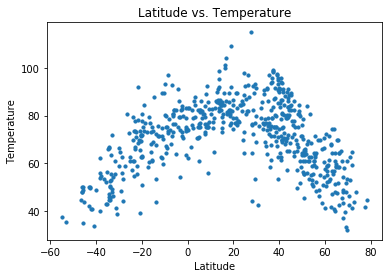

In [7]:


plt.scatter(weather_data["Lat"], weather_data["Temp"], marker="o", s=5)


plt.title("Latitude vs. Temperature")
plt.ylabel("Temperature")
plt.xlabel("Latitude")



plt.show()

#### Latitude vs. Humidity Plot

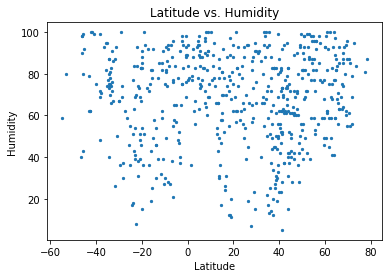

In [11]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=5)


plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")



plt.show()

#### Latitude vs. Cloudiness Plot

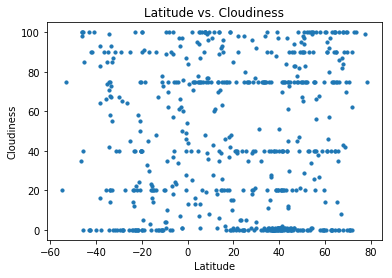

In [9]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=5)


plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")



plt.show()

#### Latitude vs. Wind Speed Plot

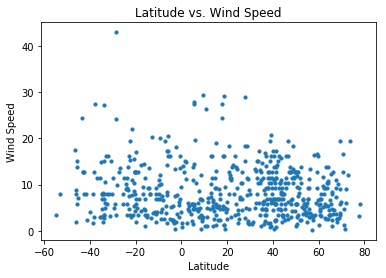

In [10]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=5)


plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")



plt.show()